In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train='train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору

path_test='test.csv' 
# содержит только имя файла, без имен папок

In [6]:
# Блок(и) обучения и поверки модели

In [7]:
train=pd.read_csv(path_train)
test=pd.read_csv(path_test)
train['quality']=train['quality'].apply(lambda x: 1 if x >= 7 else 0)
train1=train[train['quality']==0]
train2=train[train['quality']==1]
Q1 = train1.quantile(0.25)
Q3 = train1.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = ((train1 < lower_bound) | (train1 > upper_bound)).any(axis=1)
train1 = train1[~outlier_mask]
train_new=pd.concat([train1,train2])
pipe = Pipeline([("scaler",MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=14,p=3,weights='distance'))])
pipe.fit(train_new.drop('quality',axis=1),train_new['quality'] )


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=14, p=3,
                                      weights='distance'))])

In [8]:
# Блок предсказания с использованием тестового набора

In [9]:
y_pred=pipe.predict(test)

In [10]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = y_pred

0.6651982378854625

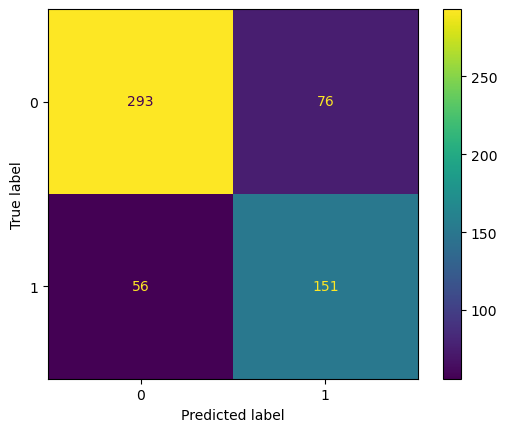

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
import numpy as np


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)